In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 1. Xử lý dữ liệu lượng khách quốc tế (foreign_tourist.csv)
foreign_tourist_df = pd.read_csv('foreign_tourist.csv')
foreign_tourist_df = foreign_tourist_df[(foreign_tourist_df['Năm'] >= 2019) & (foreign_tourist_df['Năm'] <= 2024)]
foreign_tourist_grouped = foreign_tourist_df.groupby('Năm')['Tổng lượt khách cả năm'].sum().reset_index()

# 2. Xử lý dữ liệu lạm phát (inflation_rate.csv)
# Kiểm tra và loại bỏ các giá trị null trước khi tách cột
inflation_df = pd.read_csv('inflation_rate.csv')

inflation_df = inflation_df.dropna(subset=['Date'])

# Chuyển đổi cột Date sang dạng datetime và tách thành Year và Month
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'], format='%b %Y')
inflation_df['Year'] = inflation_df['Date'].dt.year
inflation_df['Month'] = inflation_df['Date'].dt.month

inflation_df['Inflation Rate'] = inflation_df['Inflation Rate'].astype(str).str.replace('%', '').astype(float)

inflation_avg = inflation_df.groupby('Year')['Inflation Rate'].mean().reset_index()
inflation_avg = inflation_avg[(inflation_avg['Year'] >= 2019) & (inflation_avg['Year'] <= 2024)]

gdp_df = pd.read_csv('gdp_20192024.csv')
total_revenue_df = pd.read_csv('total_revenue.csv')

In [23]:
plt.figure(figsize=(30, 30))
plt.bar(foreign_tourist_grouped['Năm'], foreign_tourist_grouped['Tổng lượt khách cả năm'], color='skyblue')
plt.title('Lượng khách du lịch quốc tế theo năm (2019-2024)')
plt.xlabel('Năm')
plt.ylabel('Tổng lượt khách')
plt.grid(True)

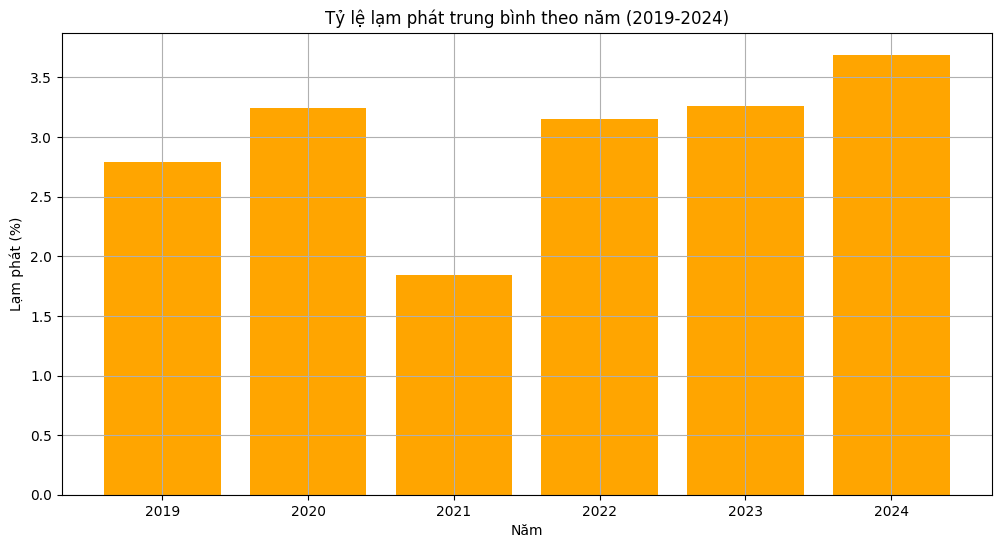

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(inflation_avg['Year'], inflation_avg['Inflation Rate'], color='orange')
plt.title('Tỷ lệ lạm phát trung bình theo năm (2019-2024)')
plt.xlabel('Năm')
plt.ylabel('Lạm phát (%)')
#plt.savefig('inflation_rate.png')
plt.grid(True)

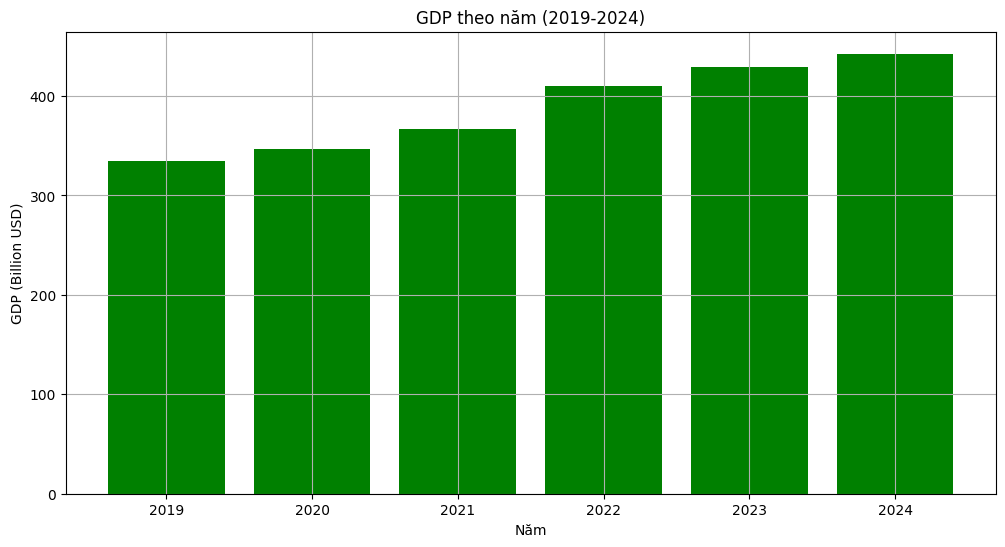

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(gdp_df['Year'], gdp_df['GDP (Billion USD)'], color='green')
plt.title('GDP theo năm (2019-2024)')
plt.xlabel('Năm')
plt.ylabel('GDP (Billion USD)')
#plt.savefig('gdp_20192024.png')
plt.grid(True)

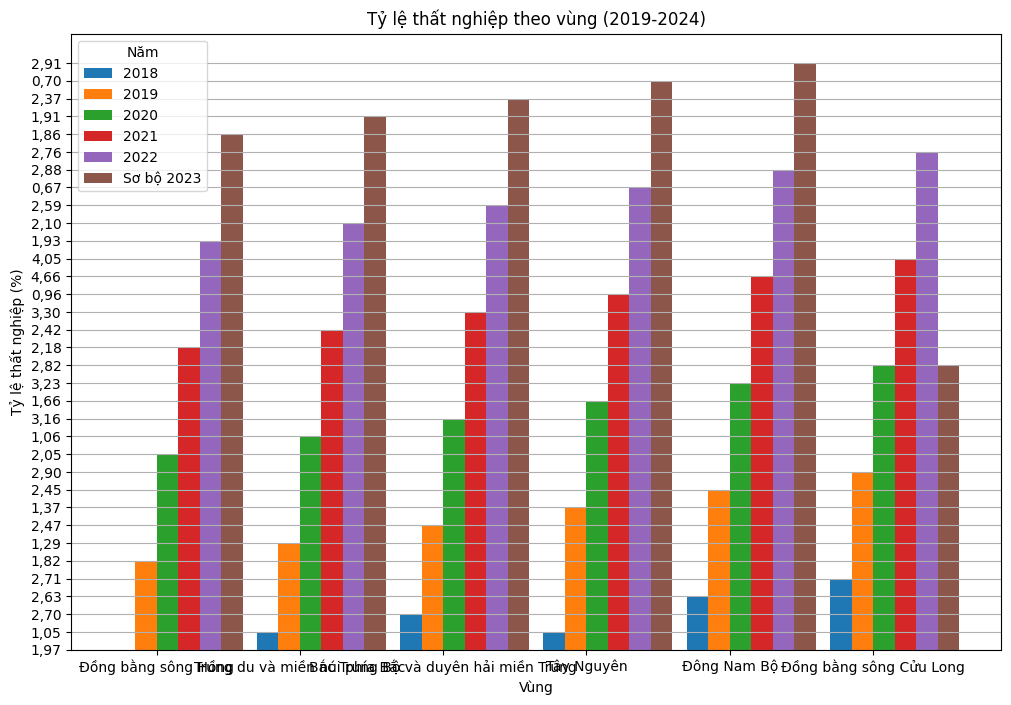

In [26]:
# Đọc dữ liệu thất nghiệp (unemployment.csv)
unemployment_df = pd.read_csv('unemployment.csv')

# Lọc dữ liệu từ 2019 đến 2024
region_rows = [1, 13, 28, 43, 49, 56]  # Các dòng chứa dữ liệu vùng
unemployment_df = unemployment_df.iloc[region_rows, :]
unemployment_df.reset_index(drop=True, inplace=True)


plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(unemployment_df['Tỉnh/Thành phố']))

for i, year in enumerate(unemployment_df.columns[1:]):
    plt.bar([p + i * bar_width for p in x], unemployment_df[year], width=bar_width, label=year)

plt.xticks([p + 1.5 * bar_width for p in x], unemployment_df['Tỉnh/Thành phố'])
plt.title('Tỷ lệ thất nghiệp theo vùng (2019-2024)')
plt.xlabel('Vùng')
plt.ylabel('Tỷ lệ thất nghiệp (%)')
plt.legend(title='Năm')
#plt.savefig('unemployment_df.png')
plt.grid(axis='y')

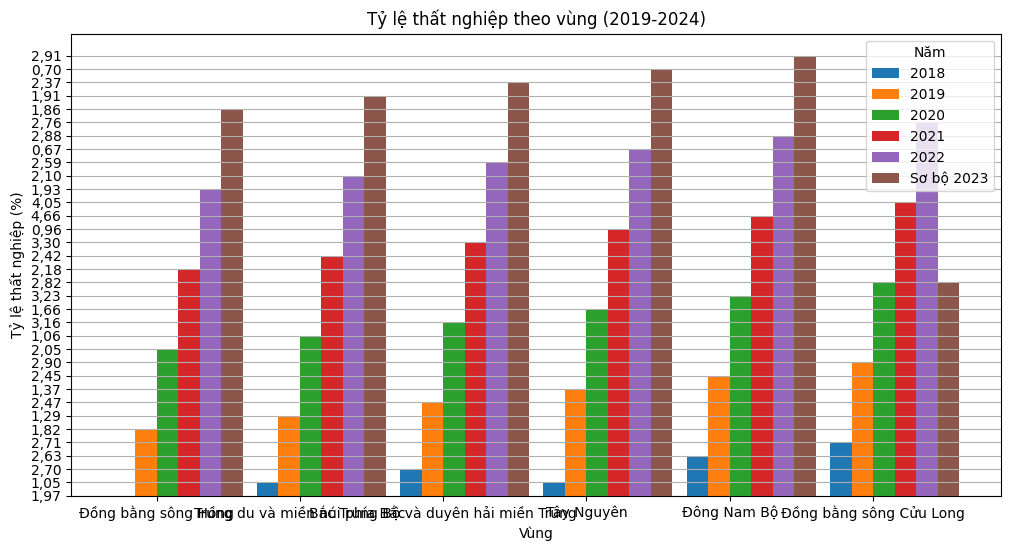

In [27]:

plt.figure(figsize=(12, 6))
bar_width = 0.15
x = range(len(unemployment_df['Tỉnh/Thành phố']))
for i, year in enumerate(unemployment_df.columns[1:]):
    plt.bar([p + i * bar_width for p in x], unemployment_df[year], width=bar_width, label=year)

plt.xticks([p + 1.5 * bar_width for p in x], unemployment_df['Tỉnh/Thành phố'])
plt.title('Tỷ lệ thất nghiệp theo vùng (2019-2024)')
plt.xlabel('Vùng')
plt.ylabel('Tỷ lệ thất nghiệp (%)')
plt.legend(title='Năm')
plt.grid(axis='y')

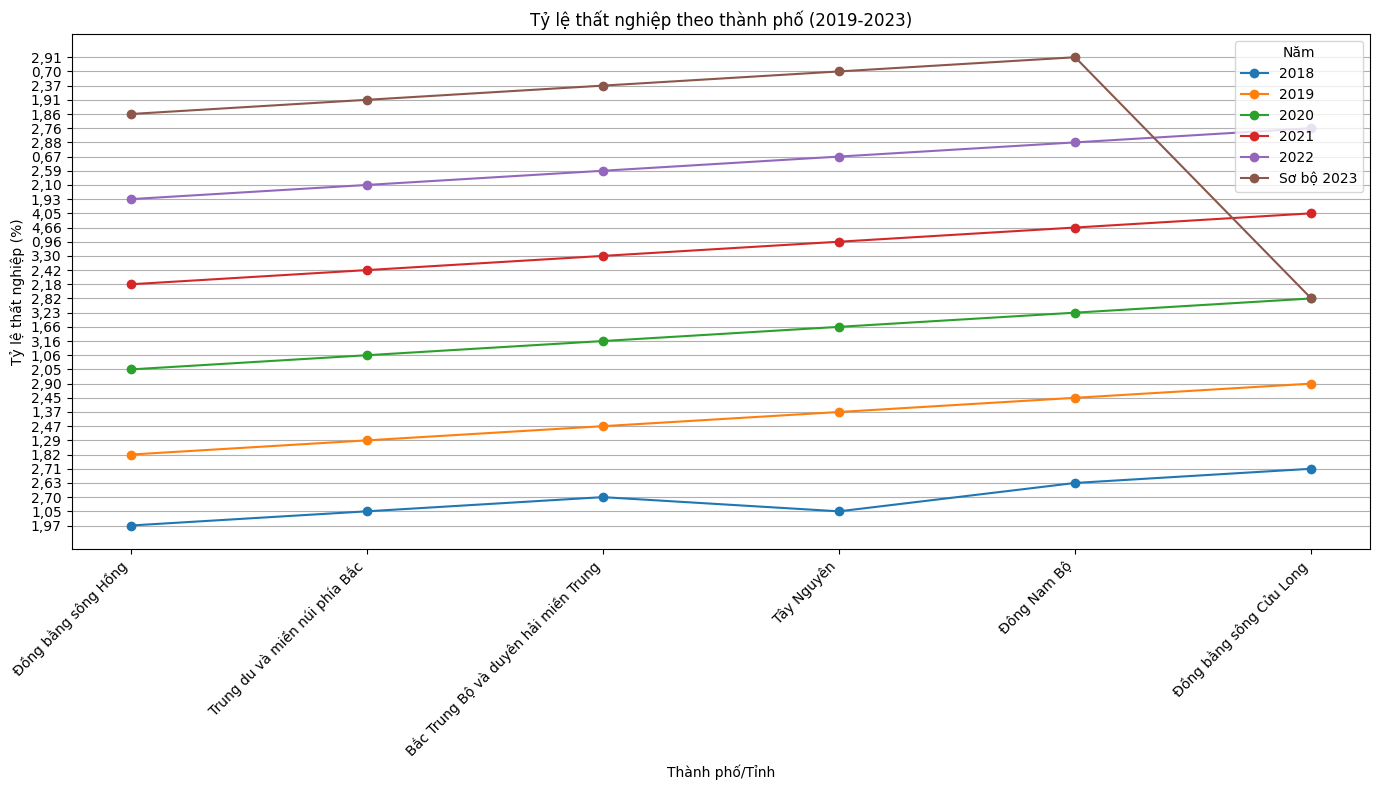

In [29]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột tỷ lệ thất nghiệp theo từng thành phố
plt.figure(figsize=(14, 8))
for year in unemployment_df.columns[1:]:
    plt.plot(unemployment_df['Tỉnh/Thành phố'], unemployment_df[year], marker='o', label=year)

plt.xticks(rotation=45, ha='right')
plt.title('Tỷ lệ thất nghiệp theo thành phố (2019-2023)')
plt.xlabel('Thành phố/Tỉnh')
plt.ylabel('Tỷ lệ thất nghiệp (%)')
plt.legend(title='Năm')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


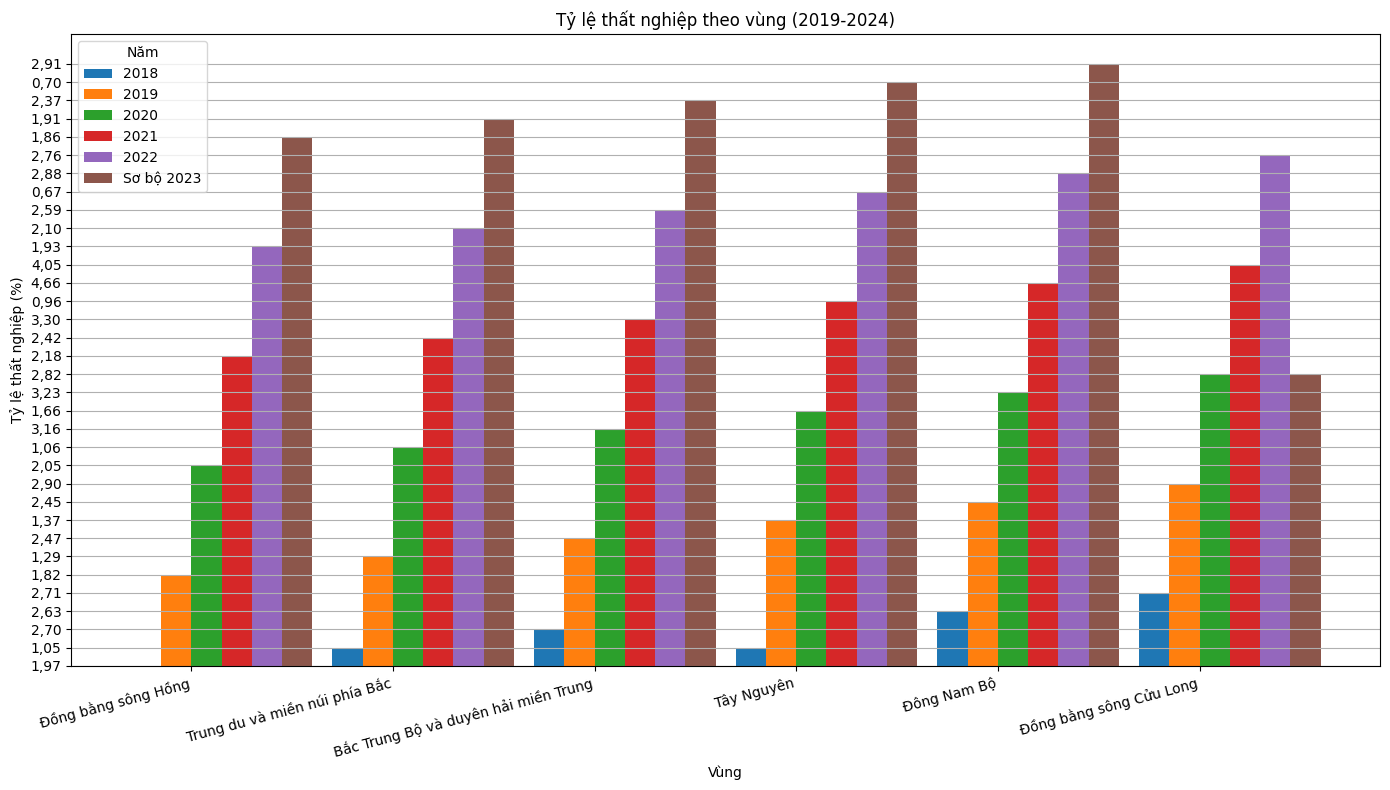

In [19]:
plt.figure(figsize=(14, 8))  # Tăng kích thước biểu đồ
bar_width = 0.15
x = range(len(unemployment_df['Tỉnh/Thành phố']))

for i, year in enumerate(unemployment_df.columns[1:]):
    plt.bar([p + i * bar_width for p in x], unemployment_df[year], width=bar_width, label=year)

plt.xticks([p + 1.5 * bar_width for p in x], unemployment_df['Tỉnh/Thành phố'], rotation=15, ha='right')
plt.title('Tỷ lệ thất nghiệp theo vùng (2019-2024)')
plt.xlabel('Vùng')
plt.ylabel('Tỷ lệ thất nghiệp (%)')
plt.legend(title='Năm')
plt.grid(axis='y')
plt.tight_layout()  # Đảm bảo bố cục không bị cắt


In [17]:
# Biểu đồ boxplot giữa lạm phát và lượng khách
tourist_unemployment['Inflation Rate'] = merged_data['Inflation Rate']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Năm', y='Tổng lượt khách cả năm', data=tourist_unemployment)
plt.title('Phân phối lượng khách du lịch theo năm')
plt.xlabel('Năm')
plt.ylabel('Tổng lượt khách')
plt.grid(True)

NameError: name 'merged_data' is not defined

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Inflation Rate', y='Tổng lượt khách cả năm', data=merged_data, color='orange')
plt.title('Mối quan hệ giữa Lạm phát và Lượng khách du lịch')
plt.xlabel('Lạm phát (%)')
plt.ylabel('Tổng lượt khách du lịch')
plt.grid(True)

NameError: name 'merged_data' is not defined

<Figure size 1200x600 with 0 Axes>